# Classify Mask Tweets 

This notebook provides a simple demonstration on how open source Python libraries can be used to classify Twitter messages.

---

First, we import necessary libraries.  We are using [scikit-learn](http://scikit-learn.org/stable/) to do most of the heavy lifting in terms of transforming and classifying data.  Scikit-learn contains a wide range of functions for performing data mining and classification tasks. We also use the [Pandas](https://pandas.pydata.org/) library for reading our data.  

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Before working with any of the training data, we set up a classification [pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that combines all required data transformation and modeling steps:

1. [Vectorize](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): This step transforms text data into numerical data that can be used for classification.  You can read more [here](https://en.wikipedia.org/wiki/Bag-of-words_model).
2. [TF-IDF](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): This is an additional transformation that is common when working with text data.  It uses statistical properties of the dataset to assign weights to text terms.  You can read more [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).
3. [Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html): Finally, we classify data that was transformed by the previous two steps.  In this case we are using a linear support vector classifier, which is commonly used in text classification tasks.  You can read more [here](https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM). 

In [2]:
classifier = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC(random_state=2,max_iter=10000, multi_class='ovr')))
])

Now we read the training data Excel file, which contains our data. But we only need 2 columns:

1. `TEXT`: The text of the tweet.
2. `Result`: Preclassified tweets (Pro, unrelated, against, neutral)

In [3]:
df = pd.read_excel("sdhealth.xlsx", "Sheet1")
df = df[df['TEXT'] != '#N/A']

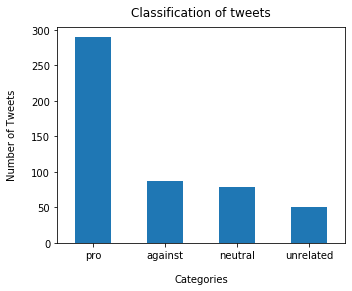

In [4]:
#Understanding the original dataset (manually classified tweets)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

df['Result'].value_counts().plot(kind='bar',figsize=(4,3), rot=0)
plt.xlabel("Categories", labelpad=14)
plt.ylabel("Number of Tweets", labelpad=14)
plt.title("Classification of tweets", y=1.02);

In [5]:
#random.shuffle(df)
selected_cols = df[['TEXT','Result']]
dtrain, dtest = train_test_split(selected_cols, train_size=.80, test_size=.20,random_state=0)

Train the classifier with `TEST` as the input and `Result` as the output.
**Note:** Because we created a classification pipeline, all of the data transformation and training is done in a single step.

In [6]:
dtrain = dtrain.values.astype(str)
dtrain = pd.DataFrame(dtrain)
dtest = dtest.values.astype(str)
dtest = pd.DataFrame(dtest)

In [7]:
# train the classifier
classifier.fit(dtrain[0], dtrain[1]);

Finally, we can see how the trained classifier performs on new tweets by using the `predict` function.

In [8]:
# try it out on some sample tweets
texts = dtest[0]

outputs = classifier.predict(texts)

pd.set_option('display.max_rows', None)
resultdf = pd.DataFrame()
resultdf['Text']=texts
resultdf['Result']=outputs

resultdf


,Text,Result
0,Who would have guessed a year ago that perhaps...,pro
1,"@jjsmokkieBOY57 @TheTweetOfGod is this true, y...",pro
2,nan,unrelated
3,"PSA from my partner (medical professional): ""W...",pro
4,@DrJayRichards It helps for those over 60 to s...,pro
5,@aubrey_huff That was F‚Äôing hell wearing my ...,neutral
6,@daryl_spear Camila rather fight me than wear ...,pro
7,@MalarchukSlit @FrankLuntz Teachers can wear m...,pro
8,@iche_me @BridgetSterli19 @realDonaldTrump @ho...,pro
9,@kilmeade Some people can‚Äôt wear masks for h...,neutral


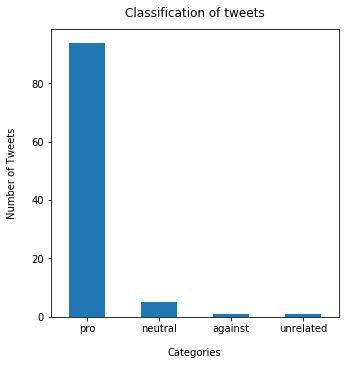

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
resultdf['Result'].value_counts().plot(kind='bar',figsize=(4,4), rot=0)
plt.xlabel("Categories", labelpad=14)
plt.ylabel("Number of Tweets", labelpad=14)
plt.title("Classification of tweets", y=1.02);


In [10]:
for text, output in zip(texts, outputs):
    print('%s --> %s' % (text, str(output)))

Who would have guessed a year ago that perhaps the best compliment of the day would be, "I love your face mask!"   #covid19 #facemask #year2020 #compliment #neighborhood #walking --> pro
@jjsmokkieBOY57 @TheTweetOfGod is this true, you do not wear a face mask? --> pro
nan --> unrelated
PSA from my partner (medical professional): "Wearing a mask only over your mouth is like wearing a condom on your balls.‚Äù   Cover your nose people! --> pro
@DrJayRichards It helps for those over 60 to stay isolated, get a lot of vitamin D and C, get in shape, and wear masks and eye cover. Tens of thousands died in nursing homes. --> pro
@aubrey_huff That was F‚Äôing hell wearing my mask I wear with my patients in friggin Costco I was about to faint. My heart was racing! Sick of it! Couldn‚Äôt wait to get in my AC of my car! Having that mask on all that time made me a bitch!! Sick of it!! --> neutral
@daryl_spear Camila rather fight me than wear her mask. That‚Äôs why she stays her ass home ü§£ü§£ü§£